# Usage of np.einsum

In [5]:
import numpy as np

In [6]:
A = np.array([[1, 7], [2, 4]])
B = np.array([[3, 3], [5, 2]])

### Return the matrix itself $A$

In [7]:
np.einsum('ij', A)

array([[1, 7],
       [2, 4]])

### Return the transpose of the matrix $A^T$

In [8]:
np.einsum('ji', A)

array([[1, 2],
       [7, 4]])

### Return elements on diagonal

In [9]:
np.einsum('ii->i', A), np.diag(A)

(array([1, 4]), array([1, 4]))

### Return dot product of two matrices $A \cdot B$

In [10]:
np.einsum('ij, ij->ij', A, B)

array([[ 3, 21],
       [10,  8]])

In [11]:
A * B

array([[ 3, 21],
       [10,  8]])

### Return dot product, sum of rows

In [12]:
np.einsum('ij, ij->i', A, B)

array([24, 18])

### Return inner product $\langle A, B \rangle = \sum_{i}\sum_{j} a_{ij}b_{ij}$

In [13]:
np.einsum('ij, ij', A, B)

42

### Matrix multiplication
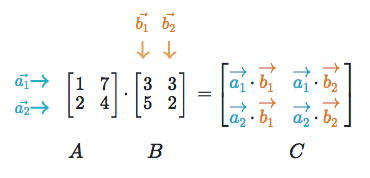

In [14]:
np.einsum('ij, jk', A, B)

array([[38, 17],
       [26, 14]])

In [15]:
np.dot(A, B)

array([[38, 17],
       [26, 14]])

# SVD Examples

In [16]:
from sklearn.decomposition import TruncatedSVD

### $A = U\Sigma V^T$ 
### $U, V$ are orthogonal matrices $\Leftrightarrow$ $UU^T = I$,  $VV^T = I$
### $\Sigma$ is diagonal matrix contains singular values corresponding to columns in $U$ and rows in $V$

In [17]:
a = np.array([[1,1,2,3],[4,5,5,6],[7,8,9,9]])
a

array([[1, 1, 2, 3],
       [4, 5, 5, 6],
       [7, 8, 9, 9]])

### Truncate from smallest singular values
### $\forall A, \exists A' = U_k\Sigma_kV_k^T \approx A$
### svd.fit_transform gives you $B=U_k\Sigma_k$

In [18]:
svd = TruncatedSVD(2) #k=2

In [19]:
b = svd.fit_transform(a)
b

array([[ 3.64908462,  1.28872246],
       [10.08671185,  0.20473492],
       [16.57622164, -0.40828119]])

### $AA^T = U\Sigma V^T V\Sigma^TU^T = U\Sigma\Sigma^TU^T$

In [20]:
np.dot(a, a.T)

array([[ 15,  37,  60],
       [ 37, 102, 167],
       [ 60, 167, 275]])

### $BB^T = U_k\Sigma_k\Sigma_k^TU_k^T \approx AA^T$

In [21]:
np.dot(b, b.T)

array([[ 14.9766241 ,  37.07111154,  59.96187424],
       [ 37.07111154, 101.78367242, 167.11598191],
       [ 59.96187424, 167.11598191, 274.93781743]])

## Query in SVD

In [22]:
q = np.array([[6, 4, 2, 1]])
q

array([[6, 4, 2, 1]])

### $Aq^T = U\Sigma V^Tq^T$
### similarities between every row in a and q

In [23]:
a.dot(q.T)

array([[ 17],
       [ 60],
       [101]])

### Recall $B=U_k\Sigma_k$, after dimentionality reduction, we need to transform $q$ into the same vector space
### Now we use $q_k = qV_k$ from svd.transform (note not $V_k^T$ here)
### $q_k^T = V_k^Tq^T$
### $Aq^T \approx Bq_k^T = U_k\Sigma_kV_k^Tq^T$
### similarities between every row in b and transformed q

In [25]:
b.dot(svd.transform(q).T)

array([[ 17.06161519],
       [ 59.81256116],
       [101.1004935 ]])

# Smoothing in PMI
## $$

# Sigmoid
### Used in binary classification, maping output value $x$ to $P(k=1|x)\in [0,1]$
## $P(k=1|x) = \frac{1}{1 + e^{-x}}$
## $P(k=0|x) = 1 - P(k=1|x) = \frac{e^{-x}}{1 + e^{-x}}$

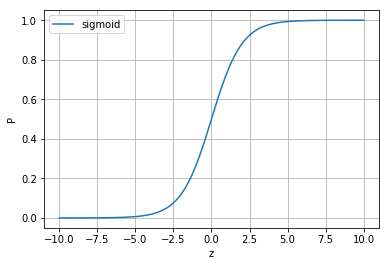

In [34]:
import matplotlib.pyplot as plt
z = np.linspace(-10, 10, 100)



plt.plot(z, 1 / (1 + np.exp(-z)), label='sigmoid')

plt.grid(True)
plt.xlabel('z')
plt.ylabel('P')

plt.legend()
plt.show()

# Softmax
### Used in multi-class classification, transform a output vector $z$ to a distribution $\sigma(z)$, $\sum_{i=1}^{k}z_k=1$
## $\sigma(z_j) = \frac{e^{z_j}}{\sum_{i=1}^{k}e^{z_i}}$

In [1]:
import math
z = [1.0, 2.0, 3.0, 4.0, 1.0, 2.0, 3.0]
z_exp = [math.exp(i) for i in z]  
print(z_exp)
sum_z_exp = sum(z_exp)  
print(sum_z_exp)
softmax = [round(i / sum_z_exp, 3) for i in z_exp]
print(softmax)

[2.718281828459045, 7.38905609893065, 20.085536923187668, 54.598150033144236, 2.718281828459045, 7.38905609893065, 20.085536923187668]
114.98389973429897
[0.024, 0.064, 0.175, 0.475, 0.024, 0.064, 0.175]
